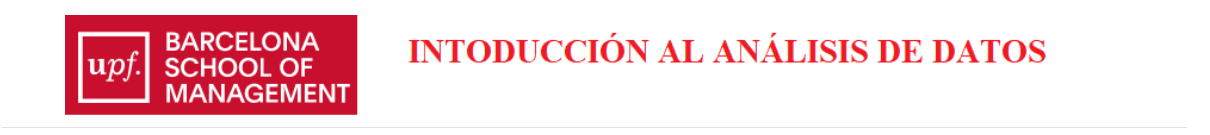

## Algunas Métricas de Riesgo de un stock

#### Objetivo:
Calcular algunas métricas de riesgo para un stock
    

### Value at Risk (VaR)



El valor en riesgo es una medida utilizada para evaluar el riesgo financiero de una cartera de inversiones o posición abierta durante un periodo de tiempo.

El VaR estima el potencial de pérdida y la probabilidad de que esta se produzca en una inversion $I$

Se calcula como el percentil 1% de la distribución de retornos para estimar el mínimo valor de rentabilidad que se espera obtener, luego se multiplica por el valor de la inversión $I$.
EL Var se expresa en Valor de acuerdo a la inversión


### Ventajas e inconvenientes del valor en riesgo

**Ventajas del valor en riesgo**

Una de las principales ventajas de la métrica VaR es que es fácil de entender y utilizar en el análisis. Esta es la razón por la que a menudo los inversores o las empresas la utilizan para analizar sus pérdidas potenciales.

Los inversores también pueden utlizar la métrica para controlar su exposición del mercado. Normalmente, una medida de riesgo tradicional es la volatilidad del mercado. Sin embargo, quizá esto no sea útil para los inversores, ya que la volatilidad puede crear un rango de oportunidades para ir en largo y en corto. En cambio, el VaR analiza las probabilidades de perder dinero y puede actuar como guía para crear una estrategia de gestión de riesgo.

**Inconvenientes del valor en riesgo**

No existe un proceso estandarizado para recopilar los datos necesarios para determinar el VaR, lo que significa que varios métodos de value at risk pueden conducir a varios resultados.

Es importante entender que el VaR en absoluto muestra al inversor las máximas pérdidas posibles; sino que muestra simplemente la probabilidad de que se produzcan pérdidas. El riesgo real para una cartera de inversiones podría ser superior a la cifra VaR, por lo que el valor en riesgo debería utilizarse como una pequeña parte de una estrategia de gestión del riesgo.

**Formas de Calculo :**
- **Histórico**: se utiliza la distribución de los retornos de los precios datos(DataFrame)
- **Teórico**: se prueba que la distribución de de los retornos satisface los supuestos de una distribución teórica, Y se usa la distribución teórica


**Ejemplo 1 :**

Para una inversion de un **dia** por un valor de 1000 U$ en el "NFLX" . 

Calcular el VaR al 99%

+ Cuál es la unidad de los datos ( dias)
+ Cuantos dias vamos a tener en cuenta-ventana de tiempo?
+ Cuál es la ventana de tiempo de inversión (1 dia)

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import kit


In [23]:
NFT = pd.read_csv("C:/Users/Lenovo/Programacion/Python/BBDD/NFLX.csv", index_col='Date', parse_dates=True)
NFT_adj = NFT[['Adj Close']]
NFT_adj

,Adj Close
Date,
2020-10-05,520.650024
2020-10-06,505.869995
2020-10-07,534.659973
2020-10-08,531.789978
2020-10-09,539.440002
...,...
2021-09-27,592.640015
2021-09-28,583.849976
2021-09-29,599.059998


In [24]:
#calcular los retornos
ret = NFT_adj.pct_change().dropna()
ret

,Adj Close
Date,
2020-10-06,-0.028388
2020-10-07,0.056912
2020-10-08,-0.005368
2020-10-09,0.014385
2020-10-12,0.000686
...,...
2021-09-27,0.000422
2021-09-28,-0.014832
2021-09-29,0.026051


In [25]:
#Calculamos el percentil 1% de los retornos
Pencentil= np.percentile(ret, 1)
Pencentil

np.float64(-0.06900517677660474)

In [20]:
VaR=1000*Pencentil
VaR

np.float64(-69.00517677660474)

In [21]:
print("""para una inversion de:1000U$ la máxima pérdida,
que se espera tener con un 99% de confianza es de:""", VaR )

para una inversion de:1000U$ la máxima pérdida,
que se espera tener con un 99% de confianza es de: -69.00517677660474


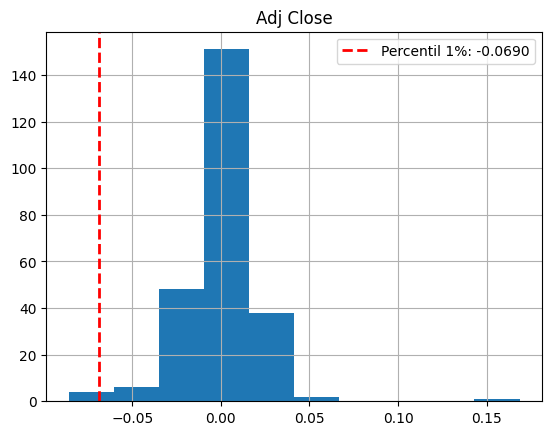

In [22]:
import matplotlib.pyplot as plt

ret.hist()
plt.axvline(Pencentil, color='red', linestyle='dashed', linewidth=2, label=f'Percentil 1%: {Pencentil:.4f}')
plt.legend()
plt.show()

## Cambiemos la ventana de análisis

**Ejemplo 2**

Calcular el VaR al 99% de una inversión de 1000U$, para un dia.

Utilizando solo los precios del mes 10

In [28]:
#seleccionamos los precios del mes 10 
oct = NFT.loc['2020-10-01':'2020-10-31']
oct_adj = oct[['Adj Close']]
oct_adj

,Adj Close
Date,
2020-10-05,520.650024
2020-10-06,505.869995
2020-10-07,534.659973
2020-10-08,531.789978
2020-10-09,539.440002
2020-10-12,539.809998
2020-10-13,554.090027
2020-10-14,541.450012
2020-10-15,541.940002


In [32]:
#Calculamos los retornos de estos precios del mes 10
ret_10 = oct_adj.pct_change().dropna()
ret_10


,Adj Close
Date,
2020-10-06,-0.028388
2020-10-07,0.056912
2020-10-08,-0.005368
2020-10-09,0.014385
2020-10-12,0.000686
2020-10-13,0.026454
2020-10-14,-0.022812
2020-10-15,0.000905
2020-10-16,-0.020574


In [33]:
# calculamos el precentil 1% de esta distribución
C10 = np.percentile(ret_10,1)
C10

np.float64(-0.0669246842084776)

In [34]:
print("""para una inversion de:1000U$ la máxima pérdida,
que se espera tener con un 99% de confianza es de:""", C10*1000 )

para una inversion de:1000U$ la máxima pérdida,
que se espera tener con un 99% de confianza es de: -66.9246842084776


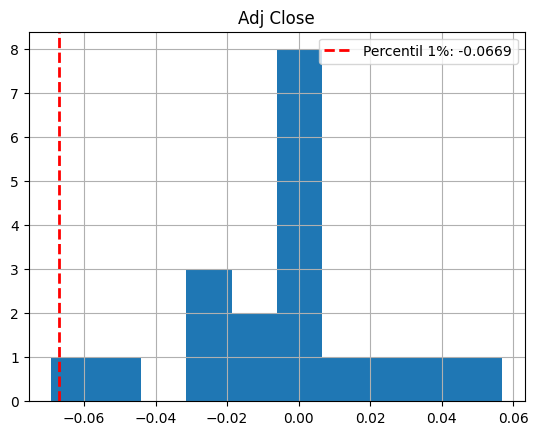

In [35]:
import matplotlib.pyplot as plt

ret_10.hist()
plt.axvline(C10, color='red', linestyle='dashed', linewidth=2, label=f'Percentil 1%: {C10:.4f}')
plt.legend()
plt.show()